In [1]:
#!pip install -U nltk

  Found existing installation: nltk 3.5
    Uninstalling nltk-3.5:
      Successfully uninstalled nltk-3.5


In [12]:
#!pip install beautifulsoup4

In [47]:
! pip install wordcloud

In [1]:
from bs4 import BeautifulSoup

In [2]:
import numpy as np
import pandas as pd
import nltk
nltk.download('punkt')
nltk.download('stopwords');

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\M.Amer\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\M.Amer\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [53]:
import matplotlib.pyplot as plt

In [3]:
# read data 
news = pd.read_excel('News.xlsx')

In [4]:
news.head()

,Title,Date Published,Info Source,Priority,Status,Main Category,News Summary
0,Tight supply nudges EU carbon prices back towa...,2021-08-16,Gas Strategies,1.0,GECFS Level,ENVIRONMENT,"<p style=""text-align: left; margin: 0pt;"">Euro..."
1,"More tankers calling at UAE's Fujairah port, b...",2021-08-16,Platts,2.0,GECFS Level,TRANSPORTATION & STORAGE,"<p style=""text-align: left; margin: 0pt 0pt 15..."
2,"US offshore output, LNG terminal utilization s...",2021-08-16,Platts,1.0,GECFS Level,SUPPLY & DEMAND,"<p style=""text-align: left; margin: 0pt 0pt 15..."
3,Crude oil futures stable to higher as pandemic...,2021-08-17,Platts,1.0,GECFS Level,PRICE COMMENTARY,"<p style=""text-align: left; margin: 0pt 0pt 8p..."
4,U.S. Gulf of Mexico oil producers consolidatio...,2021-08-17,Reuters,1.0,GECFS Level,ASSETS & INVESTMENTS,"<p style=""margin: 0in 0in 8pt;""><span style=""c..."


In [5]:
news['Main Category'].value_counts()

SUPPLY & DEMAND             12373
ASSETS & INVESTMENTS         6394
TRADE                        4409
POLICY & REGULATION          3621
ECONOMICS & GEOPOLITICS      3333
TRANSPORTATION & STORAGE     3256
UPSTREAM                     2745
ENVIRONMENT                  2286
PRICE NEWS                   1878
TECHNOLOGY                   1247
PRICE COMMENTARY              909
HYDROGEN                      194
GECF EVENT                     47
Name: Main Category, dtype: int64

In [6]:
news_oil = news[news['Title'].str.contains('oil', regex=False, case=False, na=False)]

In [7]:
news_oil = news_oil[news_oil['Main Category'].isin(['SUPPLY & DEMAND', 'PRICE COMMENTARY', 'PRICE NEWS'])]

In [8]:
news_oil.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1186 entries, 3 to 42650
Data columns (total 7 columns):
Title             1186 non-null object
Date Published    1186 non-null datetime64[ns]
Info Source       1186 non-null object
Priority          1186 non-null float64
Status            1186 non-null object
Main Category     1186 non-null object
News Summary      1186 non-null object
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 74.1+ KB


Reference 

* https://pythonhealthcare.org/2018/12/14/101-pre-processing-data-tokenization-stemming-and-removal-of-stop-words/
* https://www.youtube.com/watch?v=RLfUyn3HoaE

In [7]:
"""
# removes pattern in the input text
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for word in r:
        input_txt = re.sub(word, "", input_txt)
    return input_txt
"""

In [9]:
#news_oil['news_clean'] = news_oil['News Summary'].str.replace("[^a-zA-Z]", " ")
#news_oil.head()

### Remvore html using beautifulsoup

In [10]:
news_oil['news_clean_lambda'] = news_oil['News Summary'].apply( lambda x:BeautifulSoup(x, 'lxml').getText())

In [11]:
news_oil['news_clean'] = [BeautifulSoup(text,"lxml").get_text() for text in news_oil['News Summary'] ]

In [12]:
news_oil.head()

,Title,Date Published,Info Source,Priority,Status,Main Category,News Summary,news_clean_lambda,news_clean
3,Crude oil futures stable to higher as pandemic...,2021-08-17,Platts,1.0,GECFS Level,PRICE COMMENTARY,"<p style=""text-align: left; margin: 0pt 0pt 8p...",Crude oil futures were stable to slightly high...,Crude oil futures were stable to slightly high...
42,Oil falls as Delta surge clouds fuel demand ou...,2021-08-16,Reuters,1.0,GECFS Level,PRICE NEWS,"<span style=""color: #404040; font-family: know...","Oil prices fell more than 1% on Monday, dropp...","Oil prices fell more than 1% on Monday, dropp..."
56,OPEC+ supply boost unlikely despite call from ...,2021-08-13,Reuters,1.0,Department Level,SUPPLY & DEMAND,"<span style=""color: #404040; font-family: know...",U.S. President Joe Biden's administration on W...,U.S. President Joe Biden's administration on W...
72,"Crude oil futures steady on mixed EIA report, ...",2021-08-12,Platts,1.0,GECFS Level,PRICE COMMENTARY,"<p style=""text-align: left; margin: 0pt 0pt 15...",Crude oil futures were slightly higher during ...,Crude oil futures were slightly higher during ...
162,"Oil slumps on China travel curbs, strong U.S. ...",2021-08-09,Reuters,1.0,GECFS Level,PRICE NEWS,"<span style=""color: #404040; font-family: know...","Oil prices dropped 2% on Monday, extending las...","Oil prices dropped 2% on Monday, extending las..."


In [13]:
import re

###  Remove special characters

In [14]:
def remove_special(text):
    marks = ['(',')','[',']', '?', '.', ':', ',']
    for x in text:
        if x in marks:
            text = text.replace(x,"")
    return(text)
news_oil['news_clean_remove_cha'] = news_oil['news_clean'].apply(lambda y: remove_special(y))

In [15]:
news_oil.head(2)

,Title,Date Published,Info Source,Priority,Status,Main Category,News Summary,news_clean_lambda,news_clean,news_clean_remove_cha
3,Crude oil futures stable to higher as pandemic...,2021-08-17,Platts,1.0,GECFS Level,PRICE COMMENTARY,"<p style=""text-align: left; margin: 0pt 0pt 8p...",Crude oil futures were stable to slightly high...,Crude oil futures were stable to slightly high...,Crude oil futures were stable to slightly high...
42,Oil falls as Delta surge clouds fuel demand ou...,2021-08-16,Reuters,1.0,GECFS Level,PRICE NEWS,"<span style=""color: #404040; font-family: know...","Oil prices fell more than 1% on Monday, dropp...","Oil prices fell more than 1% on Monday, dropp...",Oil prices fell more than 1% on Monday droppi...


### Tokenize each entry

In [20]:
## apply word tokenize to all records in the news body 
from nltk.tokenize import word_tokenize
news_oil['news_clean_tokens'] = news_oil['news_clean_remove_cha'].apply(lambda x: word_tokenize(x))

In [21]:
news_oil.head()

,Title,Date Published,Info Source,Priority,Status,Main Category,News Summary,news_clean_lambda,news_clean,news_clean_remove_cha,news_tokens,news_clean_tokens
3,Crude oil futures stable to higher as pandemic...,2021-08-17,Platts,1.0,GECFS Level,PRICE COMMENTARY,"<p style=""text-align: left; margin: 0pt 0pt 8p...",Crude oil futures were stable to slightly high...,Crude oil futures were stable to slightly high...,Crude oil futures were stable to slightly high...,"[Crude, oil, futures, were, stable, to, slight...","[Crude, oil, futures, were, stable, to, slight..."
42,Oil falls as Delta surge clouds fuel demand ou...,2021-08-16,Reuters,1.0,GECFS Level,PRICE NEWS,"<span style=""color: #404040; font-family: know...","Oil prices fell more than 1% on Monday, dropp...","Oil prices fell more than 1% on Monday, dropp...",Oil prices fell more than 1% on Monday droppi...,"[Oil, prices, fell, more, than, 1, %, on, Mond...","[Oil, prices, fell, more, than, 1, %, on, Mond..."
56,OPEC+ supply boost unlikely despite call from ...,2021-08-13,Reuters,1.0,Department Level,SUPPLY & DEMAND,"<span style=""color: #404040; font-family: know...",U.S. President Joe Biden's administration on W...,U.S. President Joe Biden's administration on W...,US President Joe Biden's administration on Wed...,"[U.S., President, Joe, Biden, 's, administrati...","[US, President, Joe, Biden, 's, administration..."
72,"Crude oil futures steady on mixed EIA report, ...",2021-08-12,Platts,1.0,GECFS Level,PRICE COMMENTARY,"<p style=""text-align: left; margin: 0pt 0pt 15...",Crude oil futures were slightly higher during ...,Crude oil futures were slightly higher during ...,Crude oil futures were slightly higher during ...,"[Crude, oil, futures, were, slightly, higher, ...","[Crude, oil, futures, were, slightly, higher, ..."
162,"Oil slumps on China travel curbs, strong U.S. ...",2021-08-09,Reuters,1.0,GECFS Level,PRICE NEWS,"<span style=""color: #404040; font-family: know...","Oil prices dropped 2% on Monday, extending las...","Oil prices dropped 2% on Monday, extending las...",Oil prices dropped 2% on Monday extending last...,"[Oil, prices, dropped, 2, %, on, Monday, ,, ex...","[Oil, prices, dropped, 2, %, on, Monday, exten..."


### Stemming (make words in general form "went convertes to go"

In [29]:
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()
def stemming(text):
    stemmed_text = []
    for x in text:
        x = PorterStemmer().stem(x)
        stemmed_text.append(x)
        
    return(stemmed_text)

In [36]:
word_tokenize('Oil used his car to went to home is useful to get there faster')

['Oil',
 'used',
 'his',
 'car',
 'to',
 'went',
 'to',
 'home',
 'is',
 'useful',
 'to',
 'get',
 'there',
 'faster']

In [38]:
stemming(word_tokenize('Oil used his car to went to home is useful to get there faster'))

['oil',
 'use',
 'hi',
 'car',
 'to',
 'went',
 'to',
 'home',
 'is',
 'use',
 'to',
 'get',
 'there',
 'faster']

In [39]:
news_oil['tokens_stemmed'] = news_oil['news_clean_tokens'].apply(lambda y: stemming(y))

In [40]:
news_oil.head()

,Title,Date Published,Info Source,Priority,Status,Main Category,News Summary,news_clean_lambda,news_clean,news_clean_remove_cha,news_tokens,news_clean_tokens,tokens_stemmed
3,Crude oil futures stable to higher as pandemic...,2021-08-17,Platts,1.0,GECFS Level,PRICE COMMENTARY,"<p style=""text-align: left; margin: 0pt 0pt 8p...",Crude oil futures were stable to slightly high...,Crude oil futures were stable to slightly high...,Crude oil futures were stable to slightly high...,"[Crude, oil, futures, were, stable, to, slight...","[Crude, oil, futures, were, stable, to, slight...","[crude, oil, futur, were, stabl, to, slightli,..."
42,Oil falls as Delta surge clouds fuel demand ou...,2021-08-16,Reuters,1.0,GECFS Level,PRICE NEWS,"<span style=""color: #404040; font-family: know...","Oil prices fell more than 1% on Monday, dropp...","Oil prices fell more than 1% on Monday, dropp...",Oil prices fell more than 1% on Monday droppi...,"[Oil, prices, fell, more, than, 1, %, on, Mond...","[Oil, prices, fell, more, than, 1, %, on, Mond...","[oil, price, fell, more, than, 1, %, on, monda..."
56,OPEC+ supply boost unlikely despite call from ...,2021-08-13,Reuters,1.0,Department Level,SUPPLY & DEMAND,"<span style=""color: #404040; font-family: know...",U.S. President Joe Biden's administration on W...,U.S. President Joe Biden's administration on W...,US President Joe Biden's administration on Wed...,"[U.S., President, Joe, Biden, 's, administrati...","[US, President, Joe, Biden, 's, administration...","[us, presid, joe, biden, 's, administr, on, we..."
72,"Crude oil futures steady on mixed EIA report, ...",2021-08-12,Platts,1.0,GECFS Level,PRICE COMMENTARY,"<p style=""text-align: left; margin: 0pt 0pt 15...",Crude oil futures were slightly higher during ...,Crude oil futures were slightly higher during ...,Crude oil futures were slightly higher during ...,"[Crude, oil, futures, were, slightly, higher, ...","[Crude, oil, futures, were, slightly, higher, ...","[crude, oil, futur, were, slightli, higher, du..."
162,"Oil slumps on China travel curbs, strong U.S. ...",2021-08-09,Reuters,1.0,GECFS Level,PRICE NEWS,"<span style=""color: #404040; font-family: know...","Oil prices dropped 2% on Monday, extending las...","Oil prices dropped 2% on Monday, extending las...",Oil prices dropped 2% on Monday extending last...,"[Oil, prices, dropped, 2, %, on, Monday, ,, ex...","[Oil, prices, dropped, 2, %, on, Monday, exten...","[oil, price, drop, 2, %, on, monday, extend, l..."


### Combine stemmed into single scentence 


In [41]:
news_oil['tokens_scentence']=news_oil['tokens_stemmed'].apply(lambda x:" ".join(x))

In [42]:
news_oil.head()

,Title,Date Published,Info Source,Priority,Status,Main Category,News Summary,news_clean_lambda,news_clean,news_clean_remove_cha,news_tokens,news_clean_tokens,tokens_stemmed,tokens_scentence
3,Crude oil futures stable to higher as pandemic...,2021-08-17,Platts,1.0,GECFS Level,PRICE COMMENTARY,"<p style=""text-align: left; margin: 0pt 0pt 8p...",Crude oil futures were stable to slightly high...,Crude oil futures were stable to slightly high...,Crude oil futures were stable to slightly high...,"[Crude, oil, futures, were, stable, to, slight...","[Crude, oil, futures, were, stable, to, slight...","[crude, oil, futur, were, stabl, to, slightli,...",crude oil futur were stabl to slightli higher ...
42,Oil falls as Delta surge clouds fuel demand ou...,2021-08-16,Reuters,1.0,GECFS Level,PRICE NEWS,"<span style=""color: #404040; font-family: know...","Oil prices fell more than 1% on Monday, dropp...","Oil prices fell more than 1% on Monday, dropp...",Oil prices fell more than 1% on Monday droppi...,"[Oil, prices, fell, more, than, 1, %, on, Mond...","[Oil, prices, fell, more, than, 1, %, on, Mond...","[oil, price, fell, more, than, 1, %, on, monda...",oil price fell more than 1 % on monday drop fo...
56,OPEC+ supply boost unlikely despite call from ...,2021-08-13,Reuters,1.0,Department Level,SUPPLY & DEMAND,"<span style=""color: #404040; font-family: know...",U.S. President Joe Biden's administration on W...,U.S. President Joe Biden's administration on W...,US President Joe Biden's administration on Wed...,"[U.S., President, Joe, Biden, 's, administrati...","[US, President, Joe, Biden, 's, administration...","[us, presid, joe, biden, 's, administr, on, we...",us presid joe biden 's administr on wednesday ...
72,"Crude oil futures steady on mixed EIA report, ...",2021-08-12,Platts,1.0,GECFS Level,PRICE COMMENTARY,"<p style=""text-align: left; margin: 0pt 0pt 15...",Crude oil futures were slightly higher during ...,Crude oil futures were slightly higher during ...,Crude oil futures were slightly higher during ...,"[Crude, oil, futures, were, slightly, higher, ...","[Crude, oil, futures, were, slightly, higher, ...","[crude, oil, futur, were, slightli, higher, du...",crude oil futur were slightli higher dure midm...
162,"Oil slumps on China travel curbs, strong U.S. ...",2021-08-09,Reuters,1.0,GECFS Level,PRICE NEWS,"<span style=""color: #404040; font-family: know...","Oil prices dropped 2% on Monday, extending las...","Oil prices dropped 2% on Monday, extending las...",Oil prices dropped 2% on Monday extending last...,"[Oil, prices, dropped, 2, %, on, Monday, ,, ex...","[Oil, prices, dropped, 2, %, on, Monday, exten...","[oil, price, drop, 2, %, on, monday, extend, l...",oil price drop 2 % on monday extend last week ...


### Combine all text of all news at a specific time scale

In [44]:
low_oil_time = news_oil[(news_oil['Date Published']> '2020-01-01') & (news_oil['Date Published']<'2021-01-01')]
high_oil_time = news_oil[(news_oil['Date Published']> '2021-01-01') & (news_oil['Date Published']<'2021-08-01')]

In [45]:
low_oil_time_news = " ".join([news for news in low_oil_time['tokens_scentence']])
high_oil_time_news = " ".join([news for news in high_oil_time['tokens_scentence']])

In [56]:
low_oil_time_news

"oil gain more ground on wednesday as a us coronaviru fiscal aid packag and a declin in crude oil inventori lift price brent crude futur rose 19 cent or 04 % to $ 5128 a barrel by 0255 gmt and us west texa intermedi wti crude rose 29 cent or 06 % to $ 4829 “ oil price have remain support by a weaker us dollar overnight and have final found a friend in the api inventori report ” said stephen inn chief global market strategist at axi a broker “ thi morn the american petroleum institut report a much larger draw versu consensu in crude oil inventori for the week end decemb 25 ” oil rose on tuesday for the third time in four session on expect for rise fuel demand as the unit state may expand their pandem aid payment and a final brexit deal is set to stabil trade between europ and the uk brent crude climb 23 cent or 05 % to $ 5109 a barrel as of 0410 gmt and us west texa intermedi wti crude futur ad 23 cent or 05 % to $ 4785 a barrel crude rose along with a gain in asian share with japanes s

### Plot wordcloud

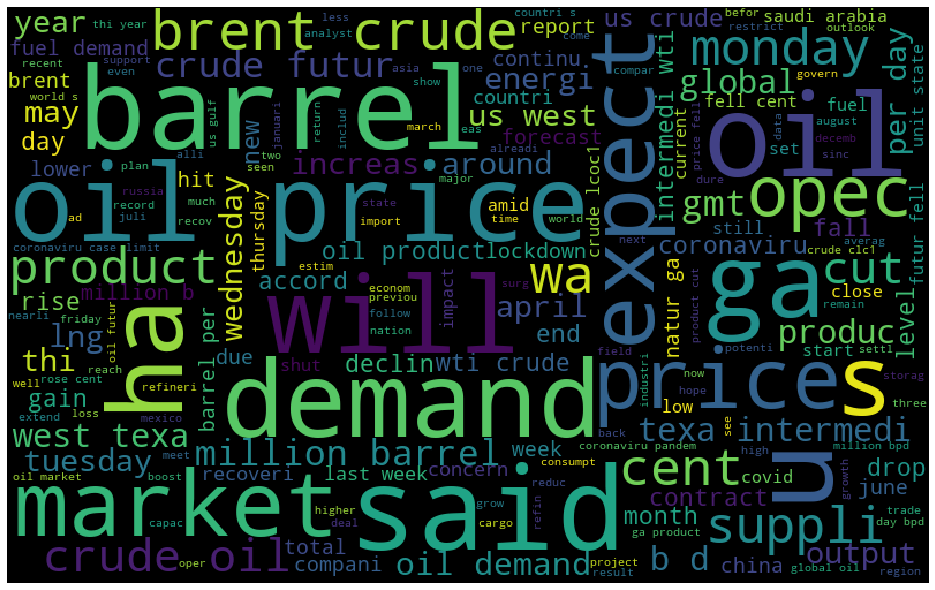

In [58]:
from wordcloud import WordCloud
wordcloud_low = WordCloud( width = 800, height = 500, random_state = 24,
                         max_font_size = 100).generate(low_oil_time_news)
plt.figure(figsize=(15,8))
plt.axis('off')
plt.imshow(wordcloud_low)
plt.tight_layout(pad = 0)
plt.show()

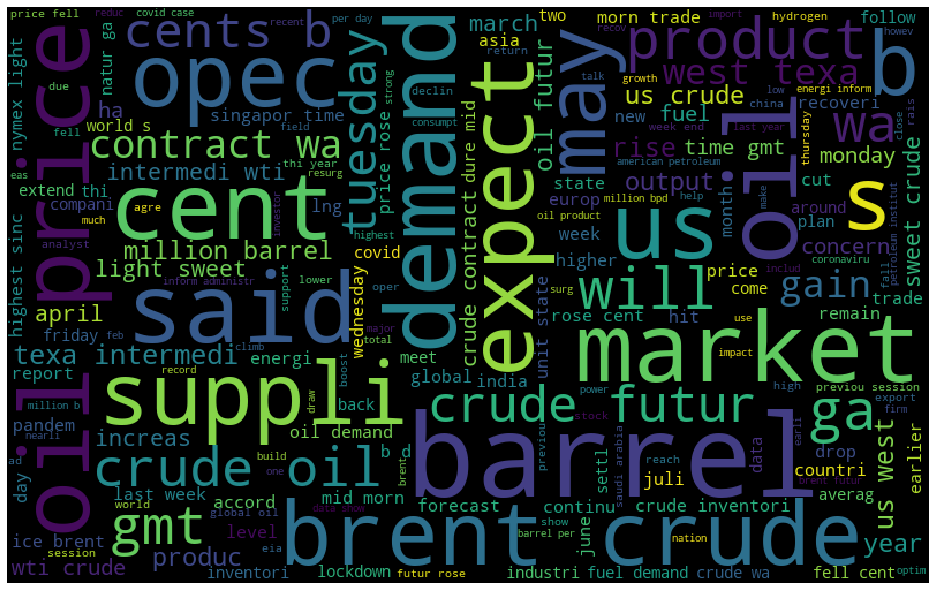

In [59]:
wordcloud_high = WordCloud( width = 800, height = 500, random_state = 24,
                         max_font_size = 100).generate(high_oil_time_news)
plt.figure(figsize=(15,8))
plt.axis('off')
plt.imshow(wordcloud_high)
plt.tight_layout(pad = 0)
plt.show()

it seems like I missed parts of speech 
* I ned to remove in, at, on, .... 

In [45]:
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()
tokens_stem = []
for i in range(len(tokens)):
    stemmed = [stemmer.stem(w) for w in tokens[i]]
    tokens_stem.append(stemmed)
    

KeyError: 0

### Remove stopwords (words that are too common)

In [33]:
from nltk.corpus import stopwords
tokens = [w for w in tokens if w not in stopwords.words('english')]

In [39]:
tokens[1]

['Oil',
 'prices',
 'fell',
 'more',
 'than',
 '1',
 '%',
 'on',
 'Monday',
 ',',
 'dropping',
 'for',
 'a',
 'third',
 'session',
 ',',
 'as',
 'government-imposed',
 'restrictions',
 'on',
 'mobility',
 'to',
 'counter',
 'the',
 'spread',
 'of',
 'the',
 'Delta',
 'variant',
 'raised',
 'worries',
 'about',
 'a',
 'recovery',
 'in',
 'fuel',
 'demand',
 '.',
 'Brent',
 'crude',
 'was',
 'down',
 '80',
 'cents',
 ',',
 'or',
 '1.1',
 '%',
 ',',
 'at',
 '$',
 '69.79',
 'a',
 'barrel',
 'by',
 '0046',
 'GMT',
 ',',
 'after',
 'edging',
 'lower',
 'last',
 'week',
 '.',
 'U.S.',
 'oil',
 'fell',
 'by',
 '81',
 'cents',
 ',',
 'or',
 '1.2',
 '%',
 ',',
 'to',
 '$',
 '67.63',
 'a',
 'barrel',
 ',',
 'having',
 'risen',
 'slightly',
 'last',
 'week',
 '.',
 '``',
 'Crude',
 'oil',
 'remained',
 'under',
 'pressure',
 'as',
 'the',
 'fast',
 'spreading',
 'Delta',
 'variant',
 'of',
 'the',
 'coronavirus',
 'casts',
 'a',
 'cloud',
 'over',
 'the',
 'outlook',
 'for',
 'demand',
 ',',
 "''"

### Stemming each 
The different tense of verbs are removed 

In [ ]:
def stem_list(row):
    my_list = row['words']
    stemmed_list = [stemming.stem(word) for word in my_list]
    return (stemmed_list)

imdb['stemmed_words'] = imdb.apply(stem_list, axis=1)

### Removing stop words
‘Stop words’ are commonly used words that are unlikely to have any benefit in natural language processing. These includes words such as ‘a’, ‘the’, ‘is’.

In [ ]:
from nltk.corpus import stopwords
stops = set(stopwords.words("english"))                  

def remove_stops(row):
    my_list = row['stemmed_words']
    meaningful_words = [w for w in my_list if not w in stops]
    return (meaningful_words)

imdb['stem_meaningful'] = imdb.apply(remove_stops, axis=1)

### Rejoin words


In [ ]:
def rejoin_words(row):
    my_list = row['stem_meaningful']
    joined_words = ( " ".join(my_list))
    return joined_words

imdb['processed'] = imdb.apply(rejoin_words, axis=1)